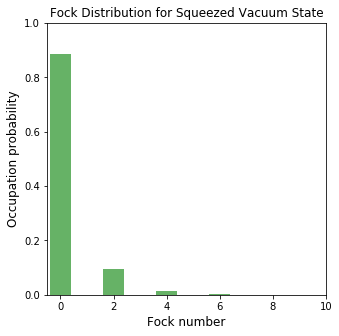

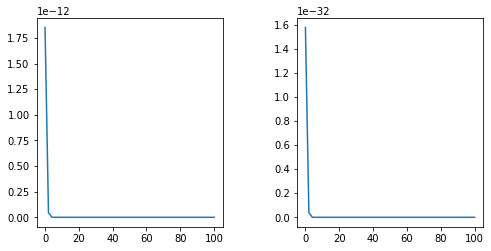

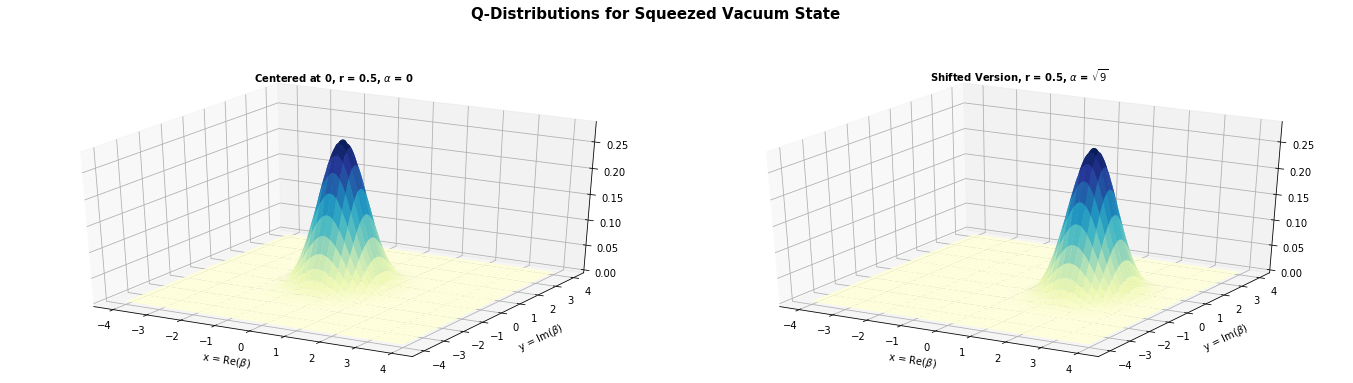

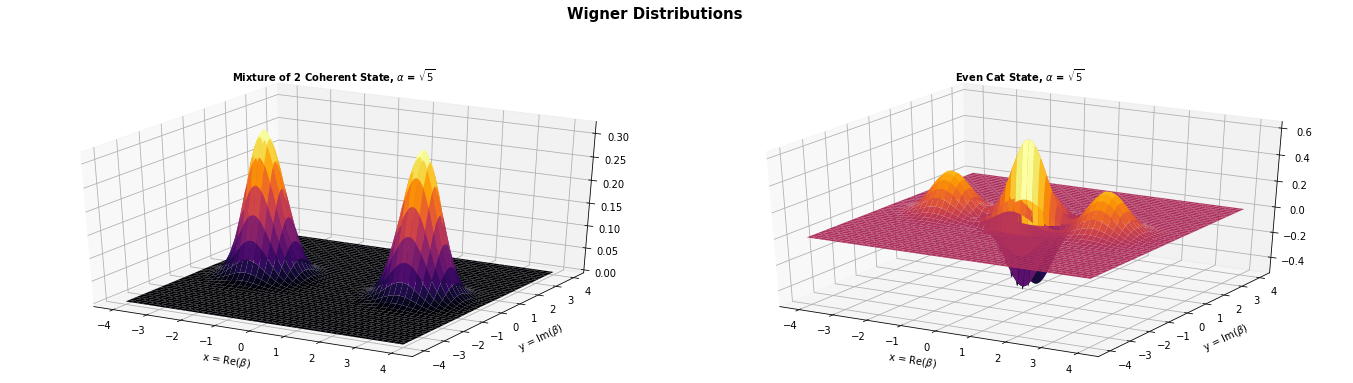

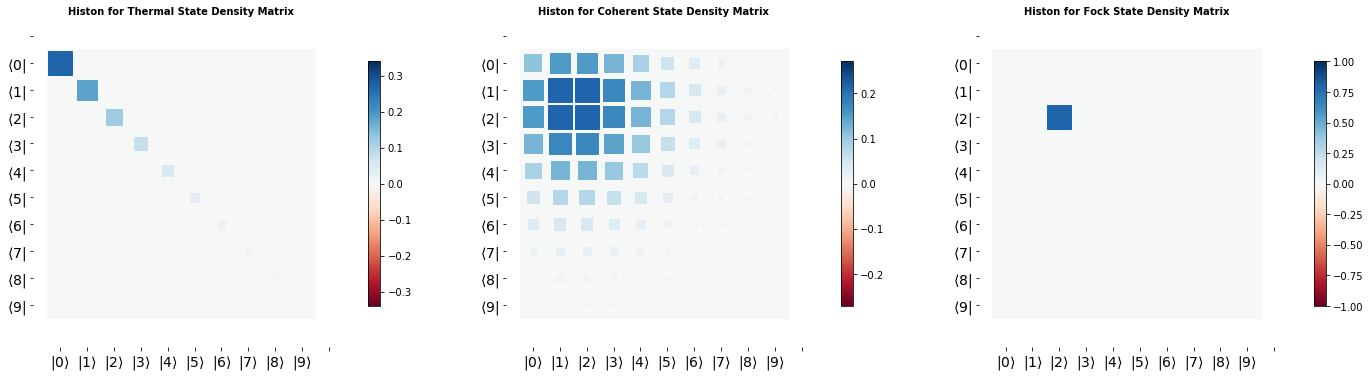

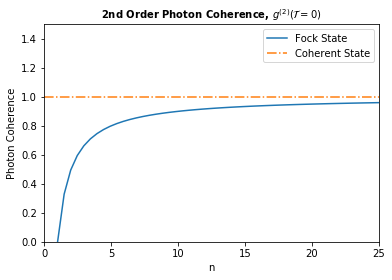

In [16]:
"""
Project-3: Nonclassical Photonic States
I, Ceren Erkut, declare that this code below solely belongs to me.
Email: ceren.erkut@ug.bilkent.edu.tr
Submitted as part of Phys-442/612: Quantum Optics course
Date: 31/03/20
"""
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from qutip import *

# Generic constants
r=0.5
k1=np.tanh(r)
k2=np.cosh(r)
k3=np.sinh(2*r)
k4=np.sinh(r)

# QUESTION 1
theta = 0
summation = fock(10,0)
for m in range(1, 5):
    summation = summation + (-1)**m * np.sqrt(factorial(2*m)) / 2**m / factorial(m) * np.exp(1j*m*theta) * k1**m * fock(10,2*m)
squeezed_vacuum_state = (1/np.sqrt(k2)) *  summation
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plot_fock_distribution(squeezed_vacuum_state, fig=fig, ax=ax, title="Fock Distribution for Squeezed Vacuum State");

# QUESTION 2
#theta-2*psi = -np.pi
n = np.linspace(0,100)
p = (0.5*k1)**n / factorial(n) / k2 * np.exp(-50 -50*np.cos(-np.pi)*k1)
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(top=0.85,hspace=0.8,wspace=0.4)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(n, p)
#theta-2*psi = 0
p = (0.5*k1)**n / factorial(n) / k2 * np.exp(-50 -50*np.cos(0)*k1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(n, p)

# QUESTION 3
fig = plt.figure(figsize=(24, 6))
fig.subplots_adjust(top=0.85,hspace=0.4,wspace=0.05)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Centered at 0, r = 0.5, $\\alpha$ = 0', fontsize=10, fontweight='bold')
plt.ylabel('y = Im($\\beta$)',labelpad=10)
plt.xlabel('x = Re($\\beta$)',labelpad=10)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Shifted Version, r = 0.5, $\\alpha$ = $\\sqrt{9}$', fontsize=10, fontweight='bold')
fig.suptitle('Q-Distributions for Squeezed Vacuum State', fontsize=15, fontweight='bold')
plt.ylabel('y = Im($\\beta$)',labelpad=10)
plt.xlabel('x = Re($\\beta$)',labelpad=10)
### PART A ###
x = np.linspace(-4,4,200)
y = np.linspace(-4,4,200)
x, y = np.meshgrid(x, y)
q = 1 / np.pi / k2 * np.exp(-(x ** 2 + y ** 2) - (x ** 2) * k1)
surf = ax1.plot_surface(x, y, q, cmap='YlGnBu', edgecolor='none')
### PART B ###
alpha = np.sqrt(9)
q = 1 / np.pi / k2 * np.exp(-(x ** 2 + y ** 2 + alpha**2) + (alpha * 2 * x)/k2 - (x ** 2 - alpha ** 2) * k1)
surf = ax2.plot_surface(x, y, q, cmap='YlGnBu', edgecolor='none')


# QUESTION 4
fig = plt.figure(figsize=(24, 6))
fig.subplots_adjust(top=0.85,hspace=0.4,wspace=0.05)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Mixture of 2 Coherent State, $\\alpha$ = $\\sqrt{5}$', fontsize=10, fontweight='bold')
plt.ylabel('y = Im($\\beta$)',labelpad=10)
plt.xlabel('x = Re($\\beta$)',labelpad=10)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('Even Cat State, $\\alpha$ = $\\sqrt{5}$', fontsize=10, fontweight='bold')
fig.suptitle('Wigner Distributions', fontsize=15, fontweight='bold')
plt.ylabel('y = Im($\\beta$)',labelpad=10)
plt.xlabel('x = Re($\\beta$)',labelpad=10)
# Statistical Mixture
alpha = np.sqrt(5)
wigner_mix = (np.exp(-2 * (x-alpha)**2 - 2 * y**2) + np.exp(-2 * (x+alpha)**2 - 2 * y**2)) / np.pi
surf = ax1.plot_surface(x, y, wigner_mix, cmap='inferno', edgecolor='none')
# Even Cat States
wigner_even = wigner_mix / (1 + np.exp(-2*alpha**2)) + 2*(np.exp(-2*x**2 - 2*y**2)*np.cos(4*y*alpha)) / np.pi / (1 + np.exp(-2*alpha**2))
surf = ax2.plot_surface(x, y, wigner_even, cmap='inferno', edgecolor='none')

# QUESTION 5
fig = plt.figure(figsize=(24, 6))
ax3 = fig.add_subplot(1,3,1)
ax3.set_title('Histon for Thermal State Density Matrix', fontsize=10, fontweight='bold')
ax4 = fig.add_subplot(1,3,2)
ax4.set_title('Histon for Coherent State Density Matrix', fontsize=10, fontweight='bold')
ax5 = fig.add_subplot(1,3,3)
ax5.set_title('Histon for Fock State Density Matrix', fontsize=10, fontweight='bold')
fig, ax3 = hinton(thermal_dm(10, 2), ax=ax3, label_top=False)
fig, ax4 = hinton(coherent_dm(10, np.sqrt(2)), ax=ax4, label_top=False)
fig, ax5 = hinton(fock_dm(10, 2), ax=ax5, label_top=False)

# QUESTION 6
fig = plt.figure()
ax = plt.axes()
plt.ylabel('Photon Coherence')
plt.xlabel('n')
ax.set_ylim([0,1.5])
ax.set_xlim([0,25])
ax.set_title('2nd Order Photon Coherence, $g^{(2)}(\\mathcal{T}=0)$', fontsize=10, fontweight='bold')
n = np.linspace(1,25)
g2_fock = 1 - 1/n
g2_coherent = 1**n 
ax.plot(n, g2_fock, label='Fock State')
ax.plot(g2_coherent, label='Coherent State', linestyle='-.')
plt.legend()

In [5]:
import numpy as np
import math
from scipy.special import hermite, factorial
import matplotlib.pyplot as plt
from qutip import *
m=2
theta=1
print(complex(0, (m*theta)))

print(fock(10,0))
print(fock(10,1))
a = 3*fock(10,0) + fock(10,1)
print(a)
r=0.5
k1=np.tanh(r)
k2=np.cosh(r)
k3=np.sinh(r)
print(k1)
print(k2)
print(k3)
xvec = np.linspace(-4,4,1)
yvec = np.linspace(-4,4,10)
# Actual computation
n = np.linspace(0,3,3)
q = factorial(n)
print(q)

2j
Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[3.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0.46211715726000974
1.1276259652063807
0.5210953054937474
[1.         1.32934039 6.        ]
